<a href="https://colab.research.google.com/github/Sapire2003/Project-Portfolio/blob/Data-Analysis/Sport_Data_Graphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-206: Text Analytics
# Noah Sapire

## FINAL PROJECT: Mine the Concordy

### Part 1: Overview

I'm giving you access to a repository of text files from [The Concordiensis Dataset](https://cs-gitlab.union.edu/webbn/concordy/). This is a collection of text files, generated from the PDF of the Concordy from 1880 to 2000.

This is 'messy' data. The text files are extracted from the PDF using OCR - optical character recognition - which means that there are errors. It is not an accurate process, and a lot of words are misspelled, or have additional characters inserted in them (or that are missing). But overall, it's enough to support an exploration - remember, our techniques are based around approximation in any case.

Worse, each text file represents the complete text of an issue of the Concordiensis. There is no segmentation of pages, sections or articles. You can TRY to find articles, based on keywords for instance.


Your job is both simple, and NOT clearly defined. I want you to work with this data, and tell me a story. What can you find? What results do you get? What do they mean? What interesting features of the language can you find that are interesting.

Some ideas include:
- An exploration of key people who have played a role in the college
- A study of a sports team or organization - when it started, who was involved, key players
- A look at the use of specific words over time
- The language shift over a century

You do not have to choose one of these. Feel free to explore something that interests you. I expect

You don't have to look at ALL the text. For instance, you could examine just a particular decade - say the 1960s - or compare the 1880s directly to the 1980s.

You should clearly state what you're looking at. And you may not find anything. The noise could be too much, but that's ok. I'm not so much interested in your *results*, as I am in your attempts, and in your interpretation of your results.

Write it up, and tell me what you find

It is ENTIRELY reasonable that stages 2, 3 and 4 are iterative - that you describe a little, do a little, report a little and then repeat. But I want an overall comprehensive study into your area of choice.

What I want is very much an ordered, neat report. DO NOT print out extraneous information (so don't do what I'm doing below). Only print out or display things that make your case. Unexplained output, or needless printing WILL BE PENALIZED.

Also do not make me read the comments in your code to understand your report. All writing and reporting must be done in TEXT boxes. You may reference printed results and graphs in those text boxes.


If you're in any doubt, ask.

**I remind you that this assignment is worth 25% of your final grade so I am looking for a substantial piece of work over the next two weeks.**

### Introduction to the Concordy

Below I show you how I work with the Concordy text, as an example. In the TEXT directory, there are text files for each issue of the Concordiensis. Each file comprises a month. So for example, the file:

> 1880-01.txt

is the text file that contains the issue for January, 1880.

If you click on the file name, you get to see the contents. The URL for that is:

https://cs-gitlab.union.edu/webbn/concordy/blob/master/Text/1880-01.txt

HOWEVER - this is NOT the URL you would use to read the text from Python. Instead I'm pointing you at the text stored on the CS web server. The link for that is:

https://cs.union.edu/~webbn/Concordy/concordy-master-Text/Text/1880-01.txt

Make sure you are accessing the right text.

Below, I'm going to show you the code that iterates through ALL of the text data, and graphs the use of the terms *men* and *women*. I'm doing the counting on a yearly basis, so I need to collect ALL of the text for a single year, and then count over that, then repeat for the next year.

This is going to run over all the text from all the issues for 120 years. It might take a while. Think about this when you're doing your work. It makes sense to start with small bits of text to make sure your ideas work, before launching on a massive text attack!


### Purpose

For this project, I intend to find out which sports' teams have the overall most favorability in terms of mentions and sentiment.  By sentiment I mean how well they are described in the newspaper.

### Instrumentation

The code for this project initially retrieves all the news from Union College's history from the year 1880 to 2000.  For this project, I have retrieved all of the data regarding the sports teams.  For each sport, the data whether the sentiment for the sentence related to them is either positive or negative.  This data is then graphed to show the polarity scores as percents of the total number of sentences regarding the particular sport.

First the important libraries are imported so that the program can do actions it couldn't normally do without.

In [ ]:
# First I'm going to do something a little bad
# I'm going to circumvent a little bit of a security issue

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# I'm importing the usual URL libraries, but
# with a bit extra
# What happens if I try to open a page that doesn't exist?
# For instance, 1880-07.text
# There IS no issue in July, 1880. If I try to access it, I'll get
# an error. So below, I show you a kind of exception handling - what
# to do WHEN I get an error.

import urllib
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError
import nltk
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

  Here, the text used is retrieved and the variables that concern what is being looked for is established so that how much of the text is looked at as well as what is being looked for can be retrieved at any point later in the program.  Union College's sports are put into a list so that they can be used throughout the program as those are what the data collection is for.  Established in the variables are the number of sentences that concern each sport as well as their polarity so that they can be accurately graphed as percentages of their total.  As the graphs are measured over each year of publication of the news, the data is graphed for each year.  Further, the yearly text, in the range of years 1880 and 2000, is retrieved, decoded, and had all its text made lowercase for use in the rest of the program.

Then, for each sentence in the year, they are checked to see whether they mention a particular sport that Union College has.  If they do, their polarity is measured and the number of sentences that mention the sport is added to.  The positive, negative, and total for each sport are put into seperate lists to graph it later.

In [ ]:
# https://cs.union.edu/~webbn/Concordy/concordy-master-Text/Text/1896-01.txt

# Here's the folder where all the raw texts live:

folder = "https://cs.union.edu/~webbn/Concordy/concordy-master-Text/Text/"


# And I'm going to generate the years, as integers

start_year = 1880
end_year = 2000
years = range(start_year,end_year+1)


# These are all the sports at the school as well as each thing being measured regarding those sports
union_sports = ['baseball', 'basketball', 'crew', 'cross country', 'football', 'hockey', 'lacrosse', 'track', 'soccer', 'swimming', 'diving','tennis']
sports_sent_total = {sport: 0 for sport in union_sports}
sports_dict_pos = {sport: [] for sport in union_sports}
sports_dict_neg = {sport: [] for sport in union_sports}
sports_dict_neu = {sport: [] for sport in union_sports}
team_mention_count = {sport: [] for sport in union_sports}
sia = SentimentIntensityAnalyzer()

# Now iterate through each (integer) year

for year in years:

  # Print the year, so I can see what processing is happening
  print(year)

  # Set up a variable to hold ALL of the text FOR THAT YEAR
  year_text =""

  for month in range(1,13):

    monthStr = str(month)

    if month < 10:
      monthStr = "0"+monthStr

    path = folder+str(year)+"-"+monthStr+".txt"
    req = Request(path)

    try:
      urlopen(req)
    except HTTPError as e:
      # do something
      print(monthStr,'MISSING: Error code: ', e.code)
    except URLError as e:
      # do something
      print('Reason: ', e.reason)
    else:
      response = urllib.request.urlopen(path)
      data = response.read()
      text = data.decode('utf-8')
      year_text+=text

  year_text = year_text.lower()

  sports_pos = {sport: 0 for sport in union_sports}
  sports_neg = {sport: 0 for sport in union_sports}
  sports_neu = {sport: 0 for sport in union_sports}

  sentences = sent_tokenize(year_text)

  for sentence in sentences:
    words = word_tokenize(sentence)
    total = sia.polarity_scores(sentence)
    score = total['compound']
    for sport in union_sports:
      if sport in words and 'team' in words:
        sports_sent_total[sport] += 1
        if score > 0.05:
          sports_pos[sport] += 1
        elif score < -0.05:
          sports_neg[sport] += 1
        else:
          sports_neu[sport] += 1

  for sport in union_sports:
    team_mention_count[sport].append(year_text.count(sport))
    if sports_sent_total[sport] == 0:
      sports_dict_pos[sport].append(0)
      sports_dict_neg[sport].append(0)
      sports_dict_neu[sport].append(0)
    else:
      sports_percentage_pos = round((sports_pos[sport] / sports_sent_total[sport]) * 100,2)
      sports_percentage_neg = round((sports_neg[sport] / sports_sent_total[sport]) * 100,2)
      sports_percentage_neu = round((sports_neu[sport] / sports_sent_total[sport]) * 100,2)

      sports_dict_pos[sport].append(sports_percentage_pos)
      sports_dict_neg[sport].append(sports_percentage_neg)
      sports_dict_neu[sport].append(sports_percentage_neu)
    sports_sent_total[sport] = 0

1880
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1881
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1882
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1883
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1884
06 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1885
06 MISSING: Error code:  404
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
12 MISSING: Error code:  404
1886
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1887
07 MISSING: Error code:  404
08 MISSING: Error code:  404
1888
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1889
07 MISSING: Error code:  404
08 MISSING: Error code:  404
09 MISSING: Error code:  404
1890
07 MISSING: Error code:  404
08 MISSING: Error

This piece of the code checks for errors, confirming that the length of all the measures were the same length and that said length is equal to the number of years being looked at.

In [ ]:
for sport in union_sports:
  print("The {} team is mentioned in {} sentences total".format(sport, len(team_mention_count[sport])))
  print("The number of positive sentiments measured for the sport is {}".format(len(sports_dict_pos[sport])))
  print("The number of negative sentiments measured for the sport is {}".format(len(sports_dict_neg[sport])))
  print("The number of neutral sentiments measured for the sport is {}".format(len(sports_dict_neu[sport])))

The baseball team is mentioned in 121 sentences total
The number of positive sentiments measured for the sport is 121
The number of negative sentiments measured for the sport is 121
The number of neutral sentiments measured for the sport is 121
The basketball team is mentioned in 121 sentences total
The number of positive sentiments measured for the sport is 121
The number of negative sentiments measured for the sport is 121
The number of neutral sentiments measured for the sport is 121
The crew team is mentioned in 121 sentences total
The number of positive sentiments measured for the sport is 121
The number of negative sentiments measured for the sport is 121
The number of neutral sentiments measured for the sport is 121
The cross country team is mentioned in 121 sentences total
The number of positive sentiments measured for the sport is 121
The number of negative sentiments measured for the sport is 121
The number of neutral sentiments measured for the sport is 121
The football team

### Data Plotting

Here, graphs are made for each individual sport.  The sports are looped through using the original list of sports.  From there, the polarities for each individual sport are mapped onto one graph as percents of the total number of sentences that discuss the sports' teams.  This is being used to measure the overall descriptions of the teams and the sentiment expressed from the Concordy.

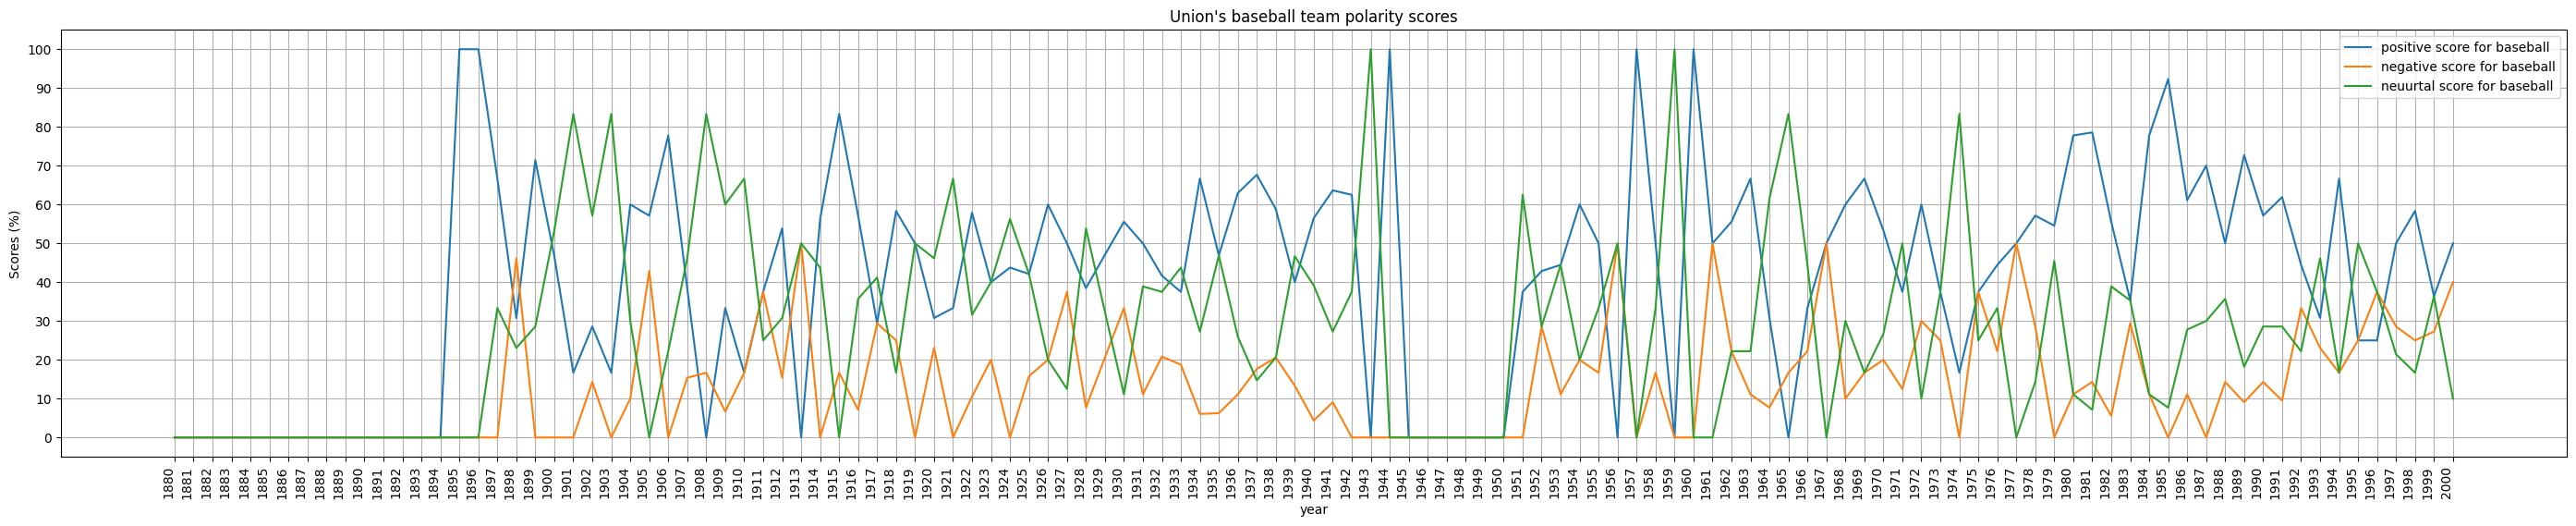

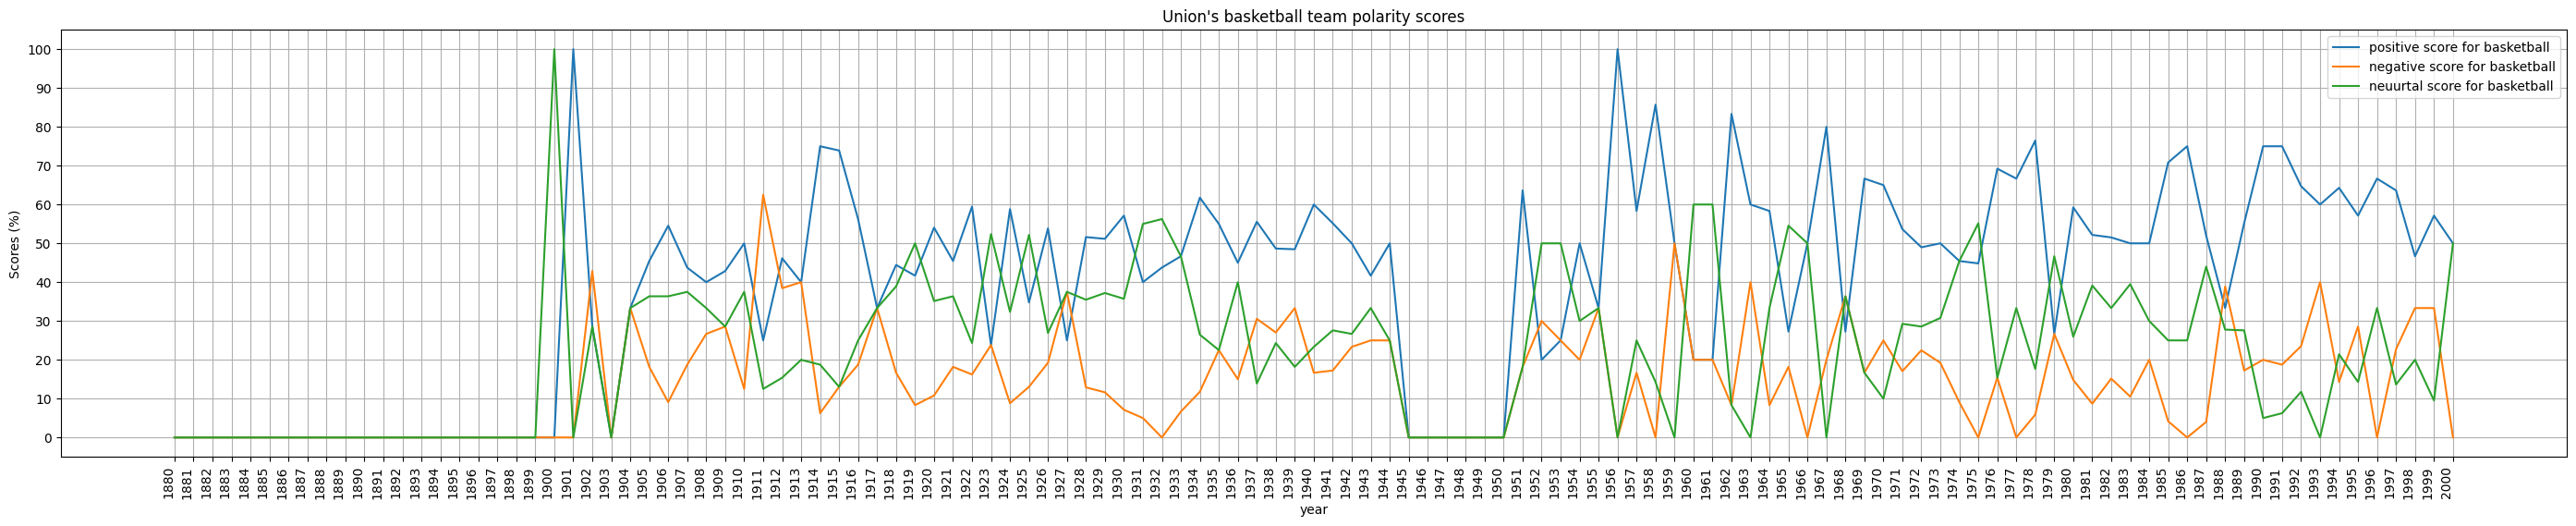

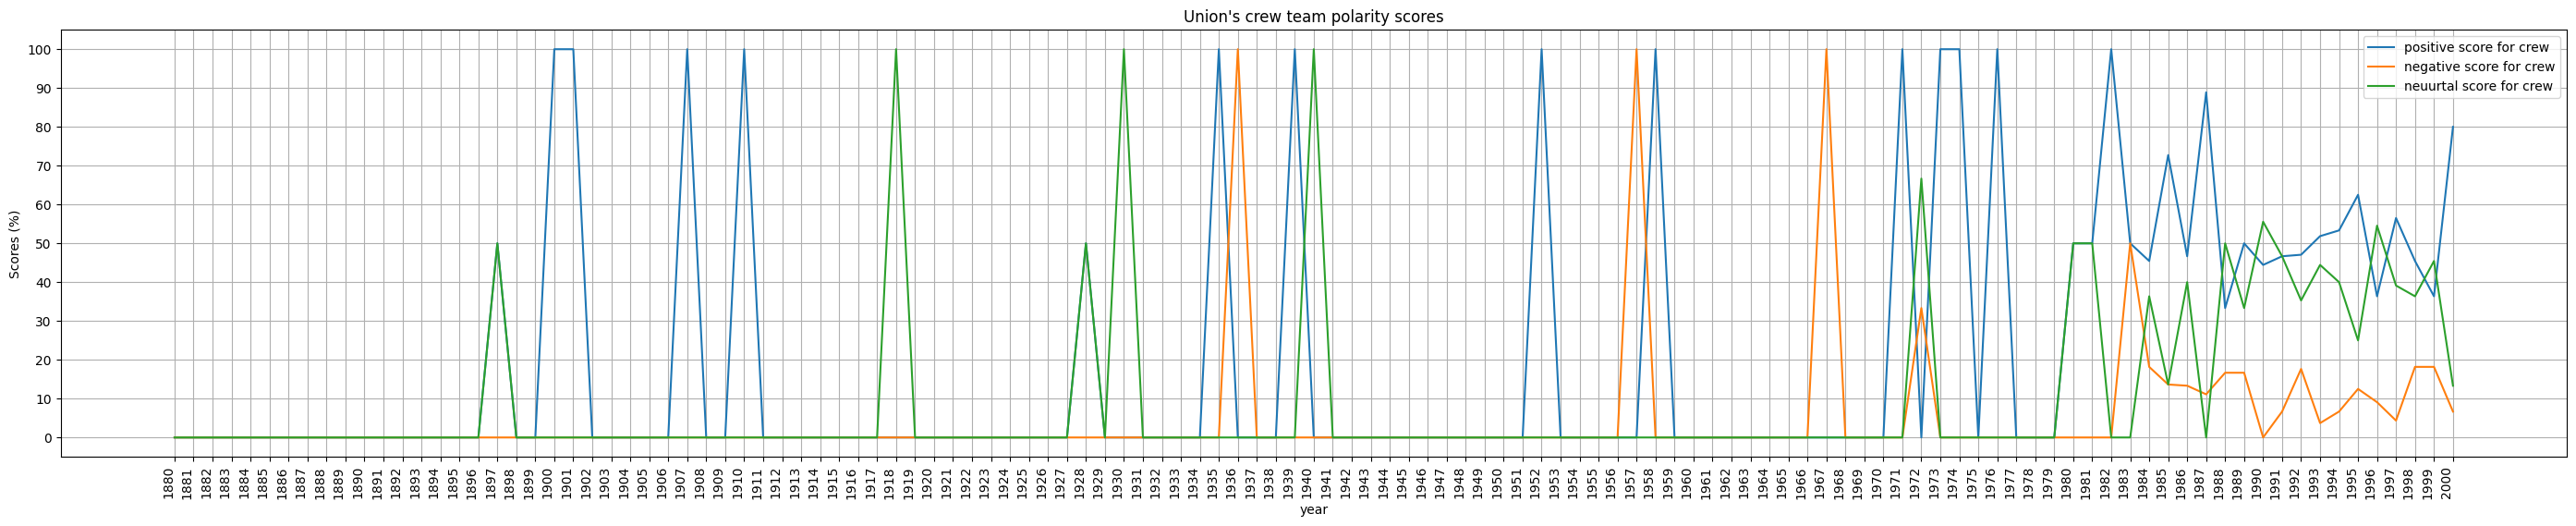

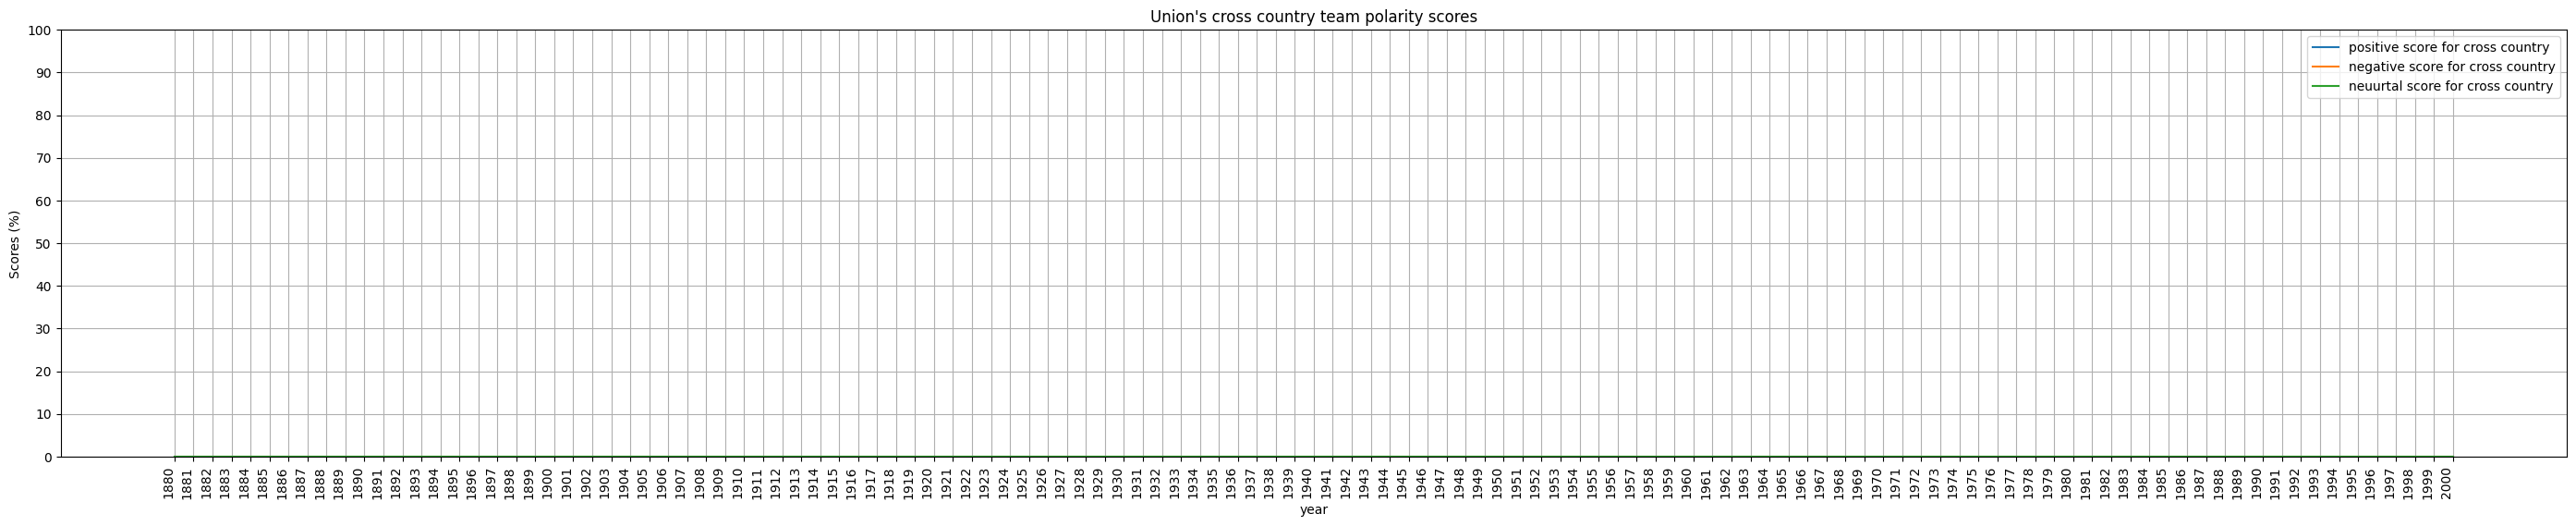

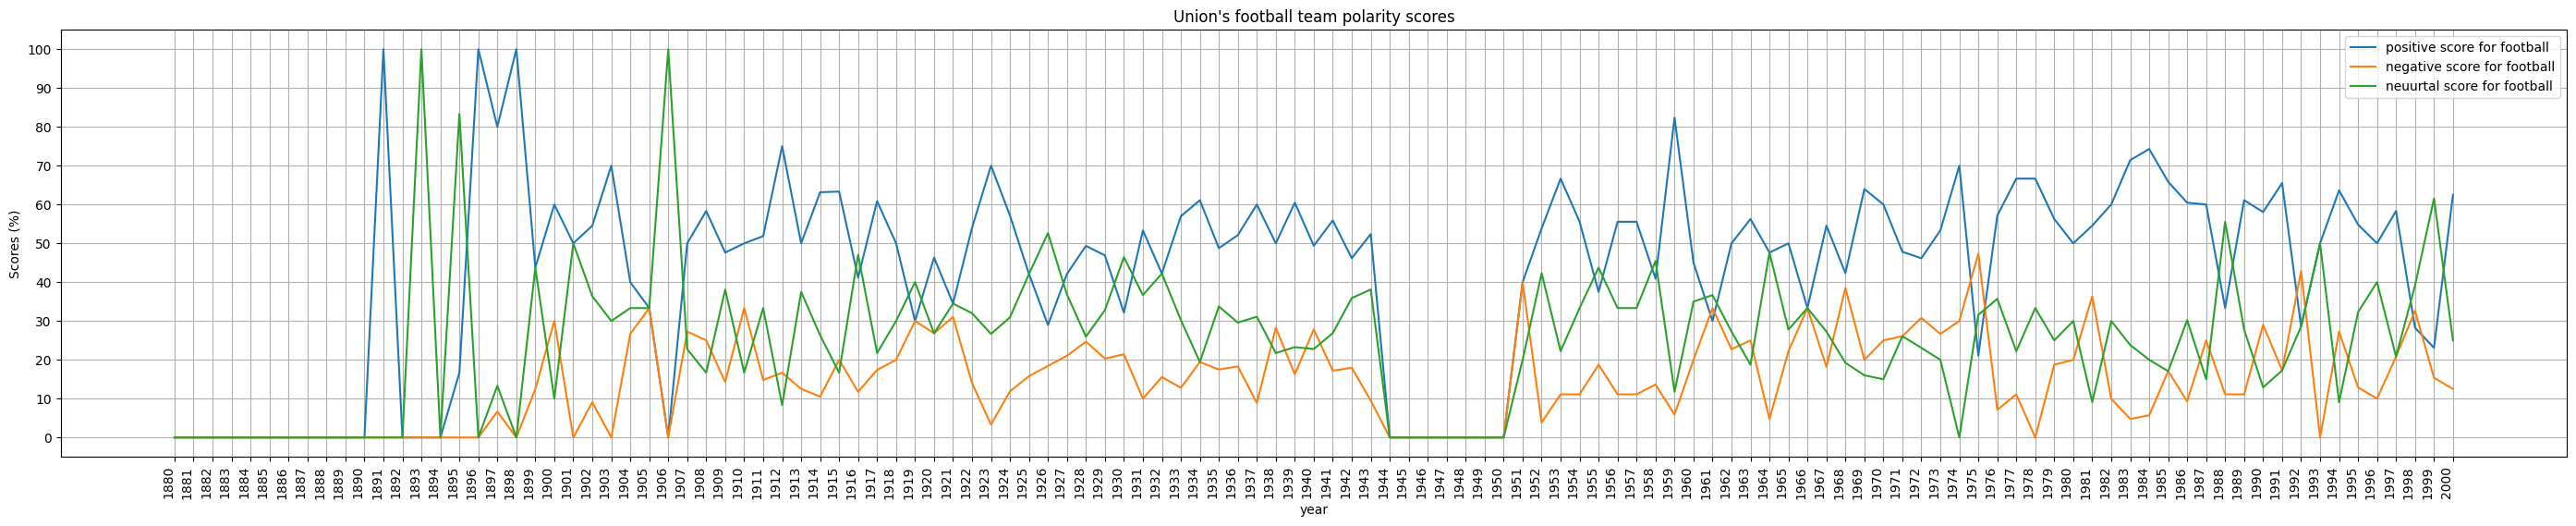

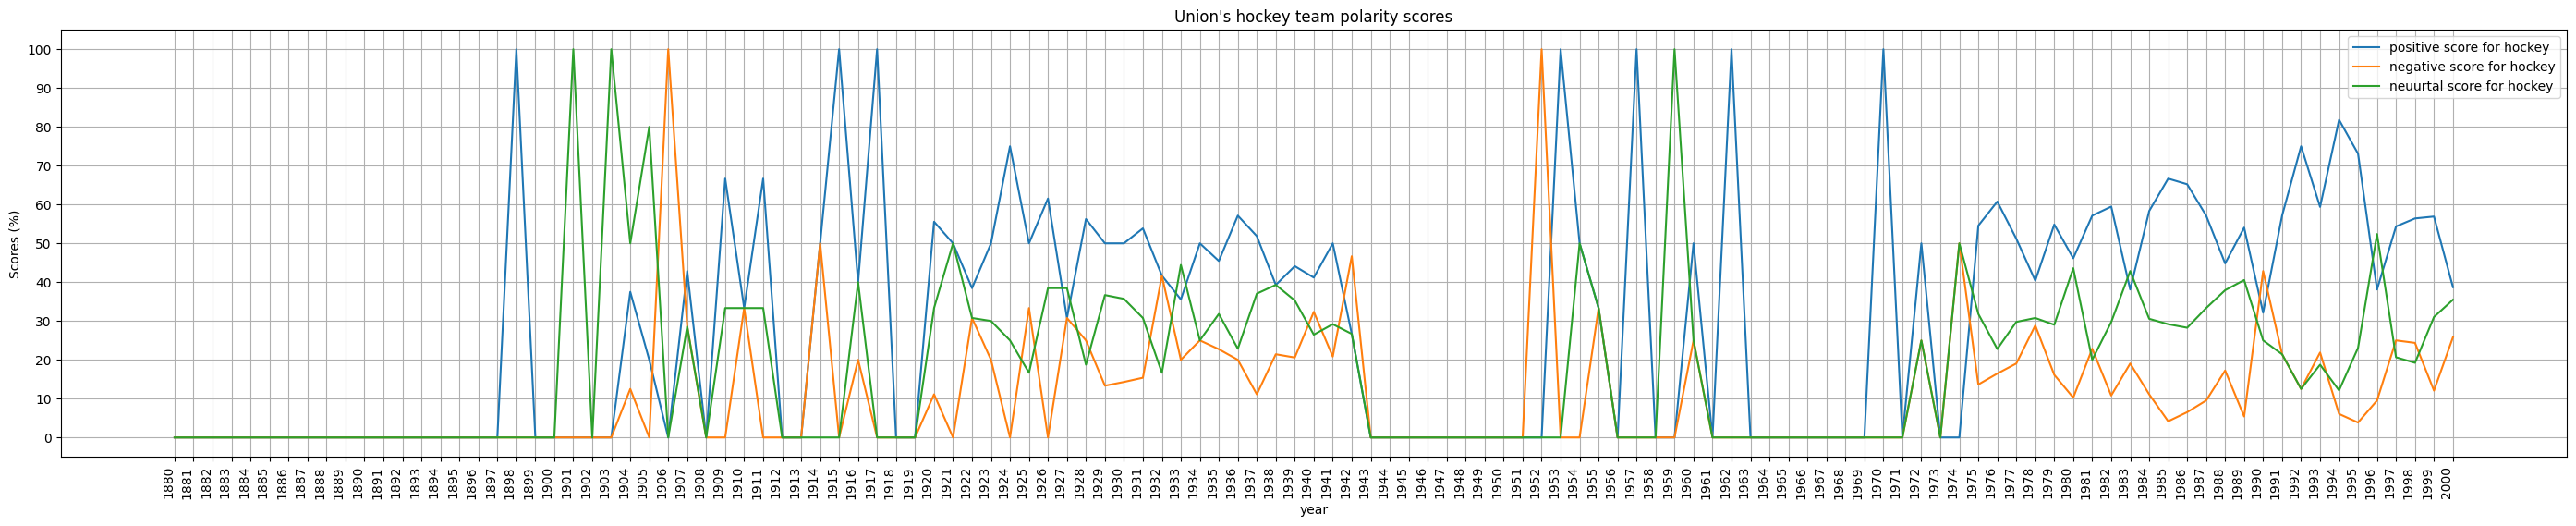

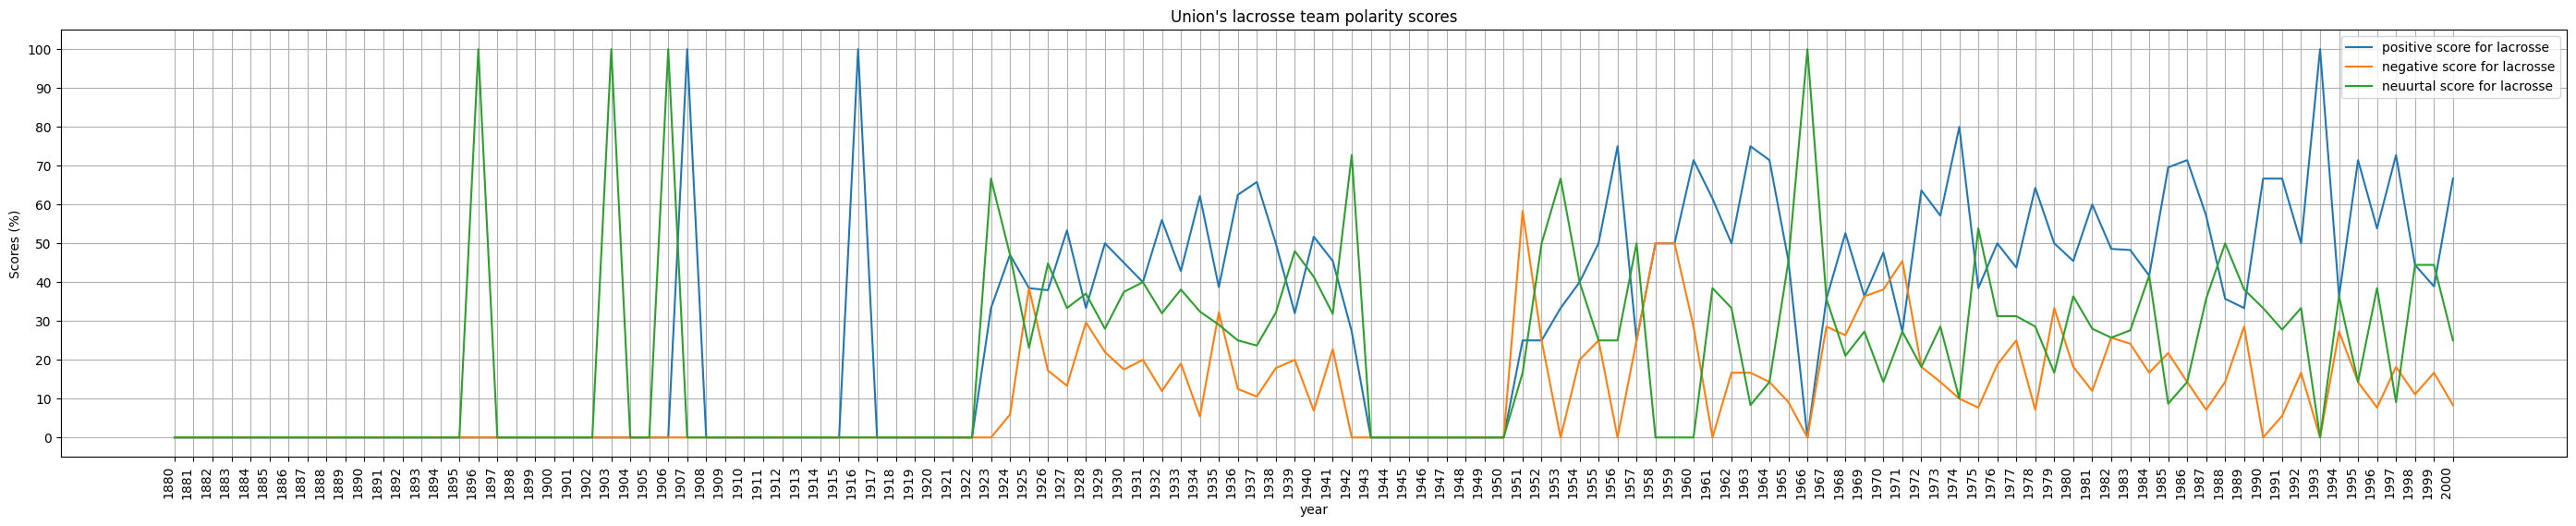

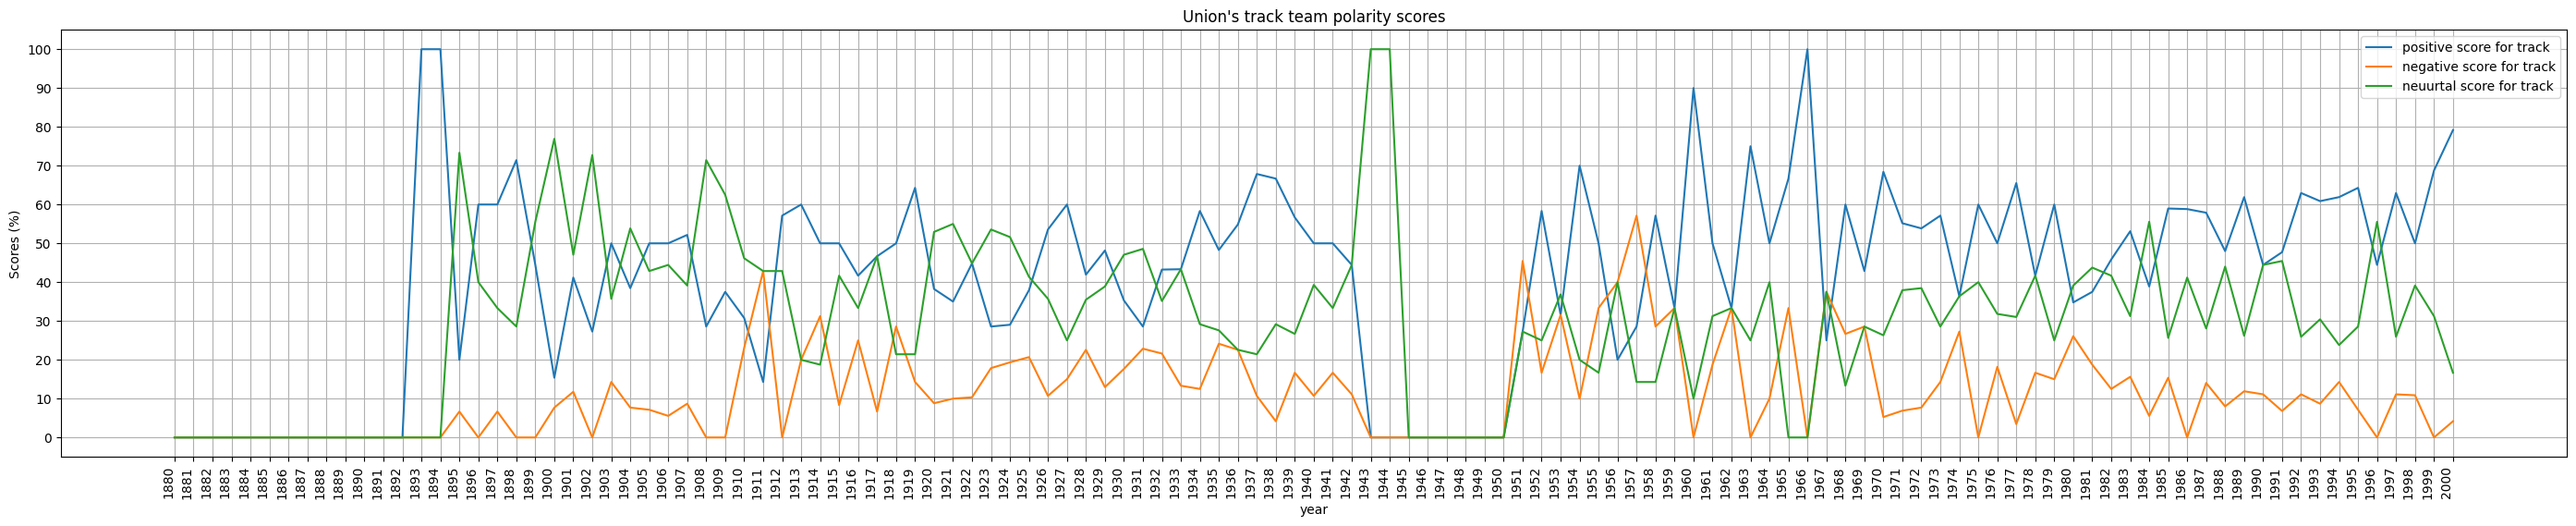

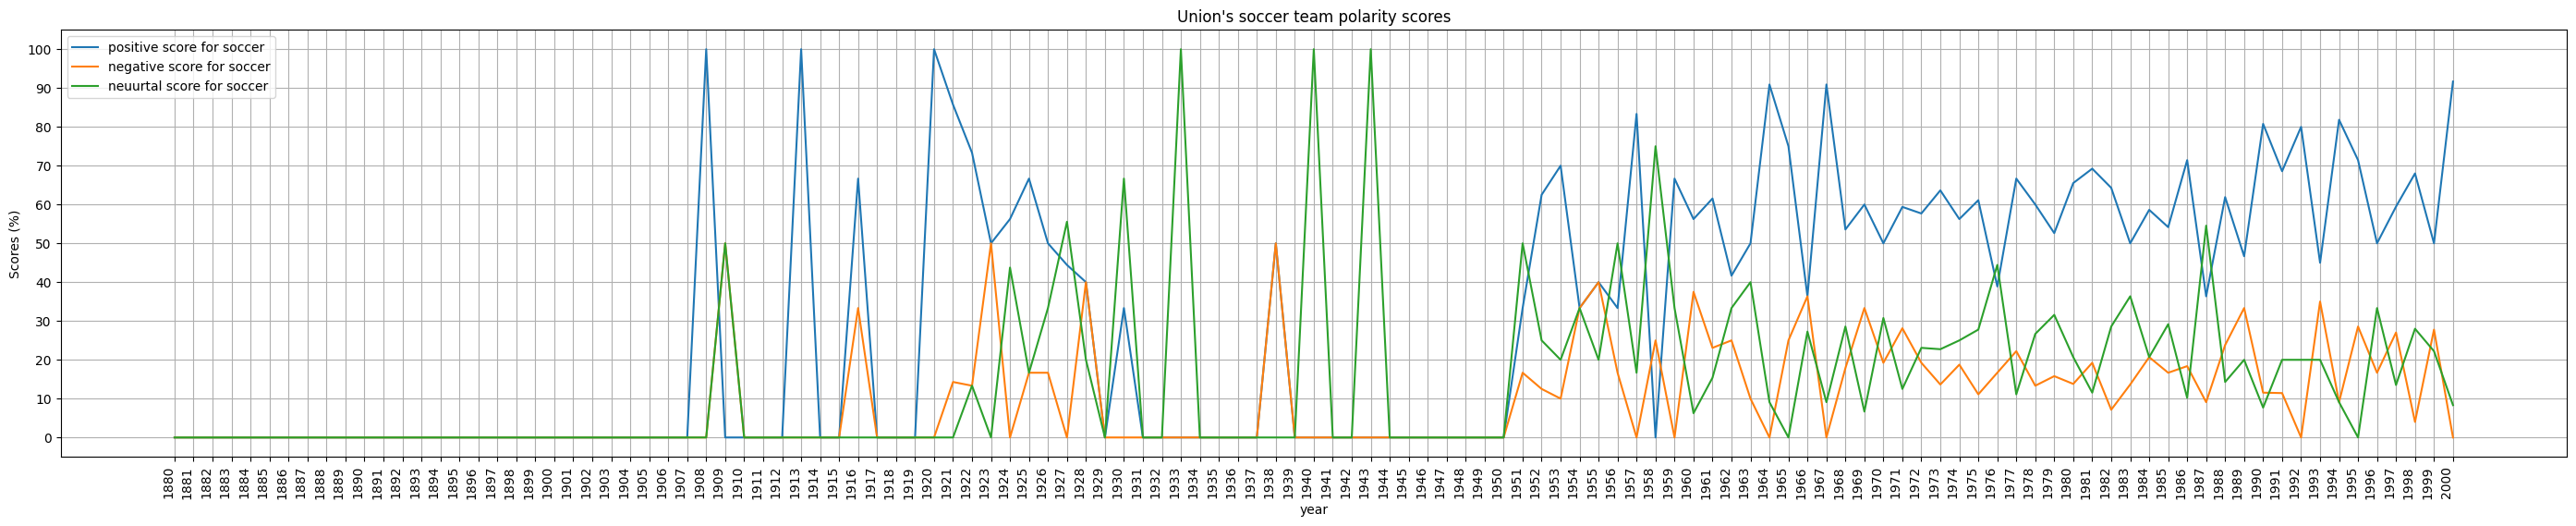

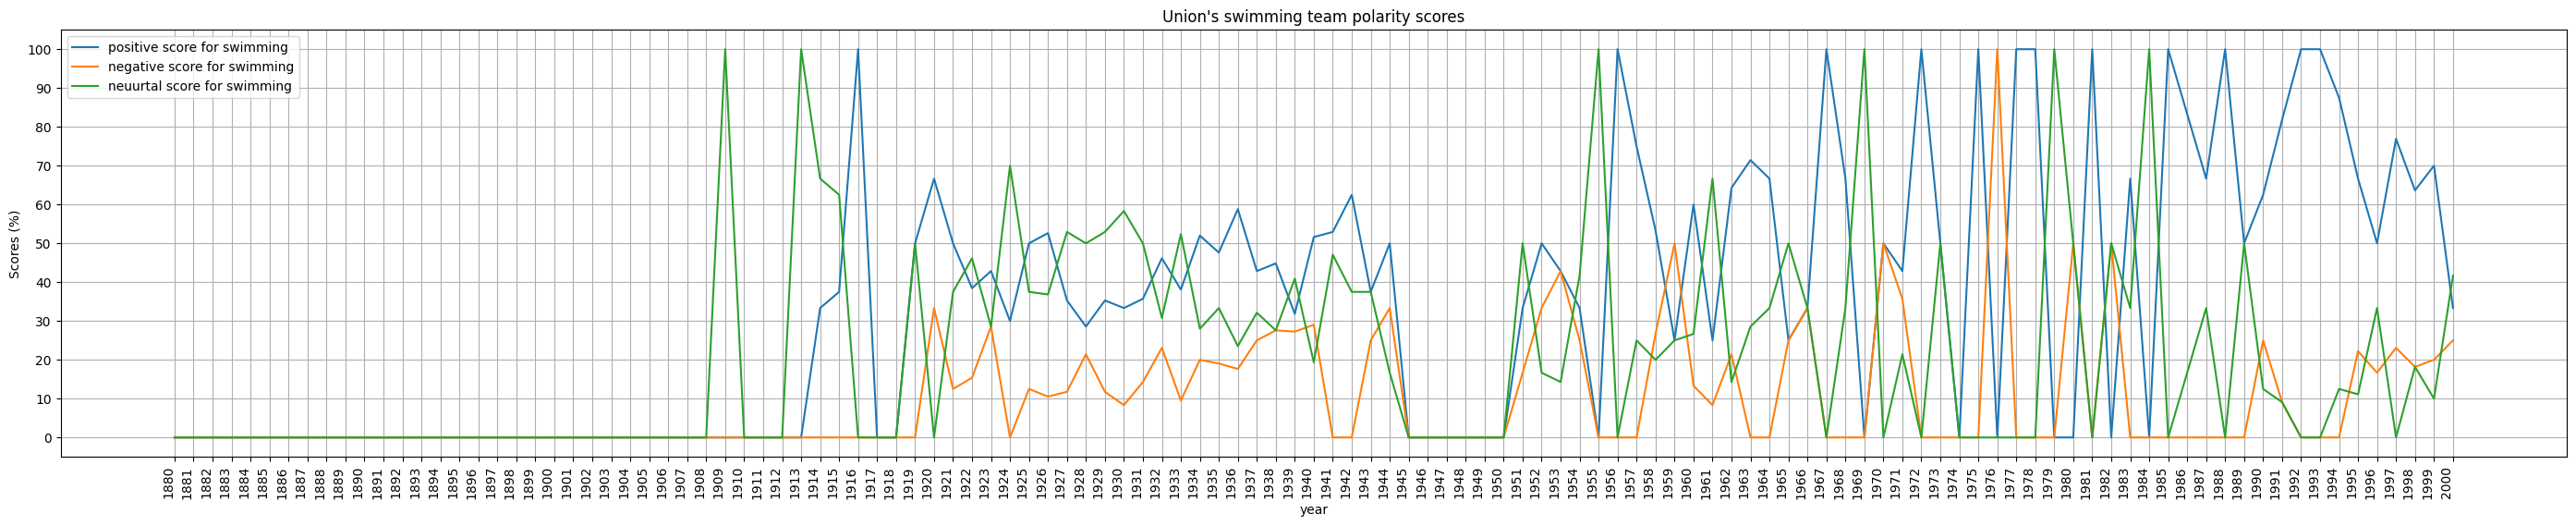

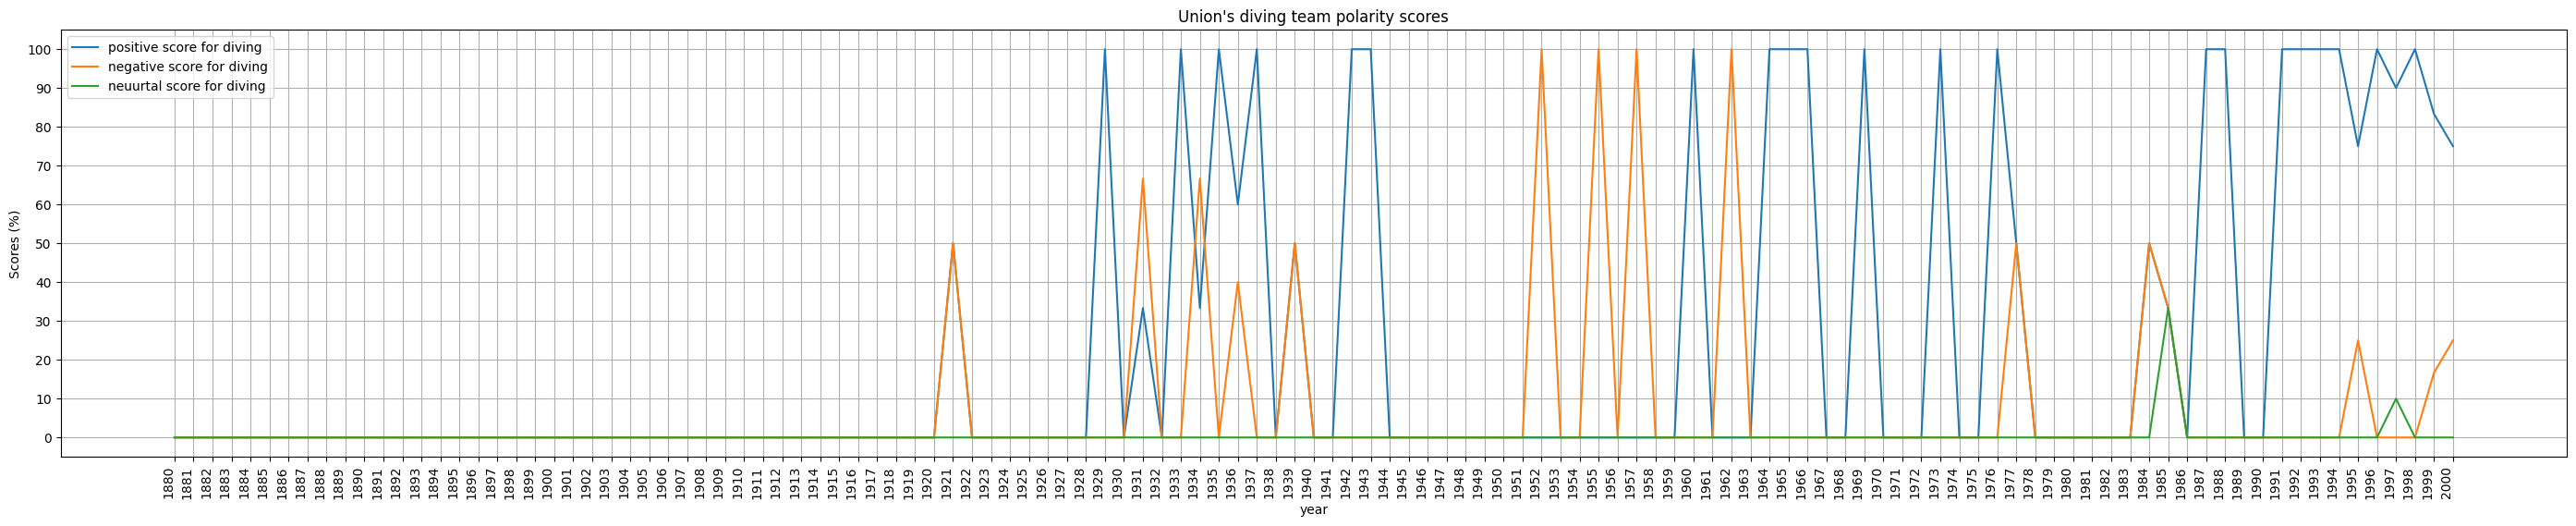

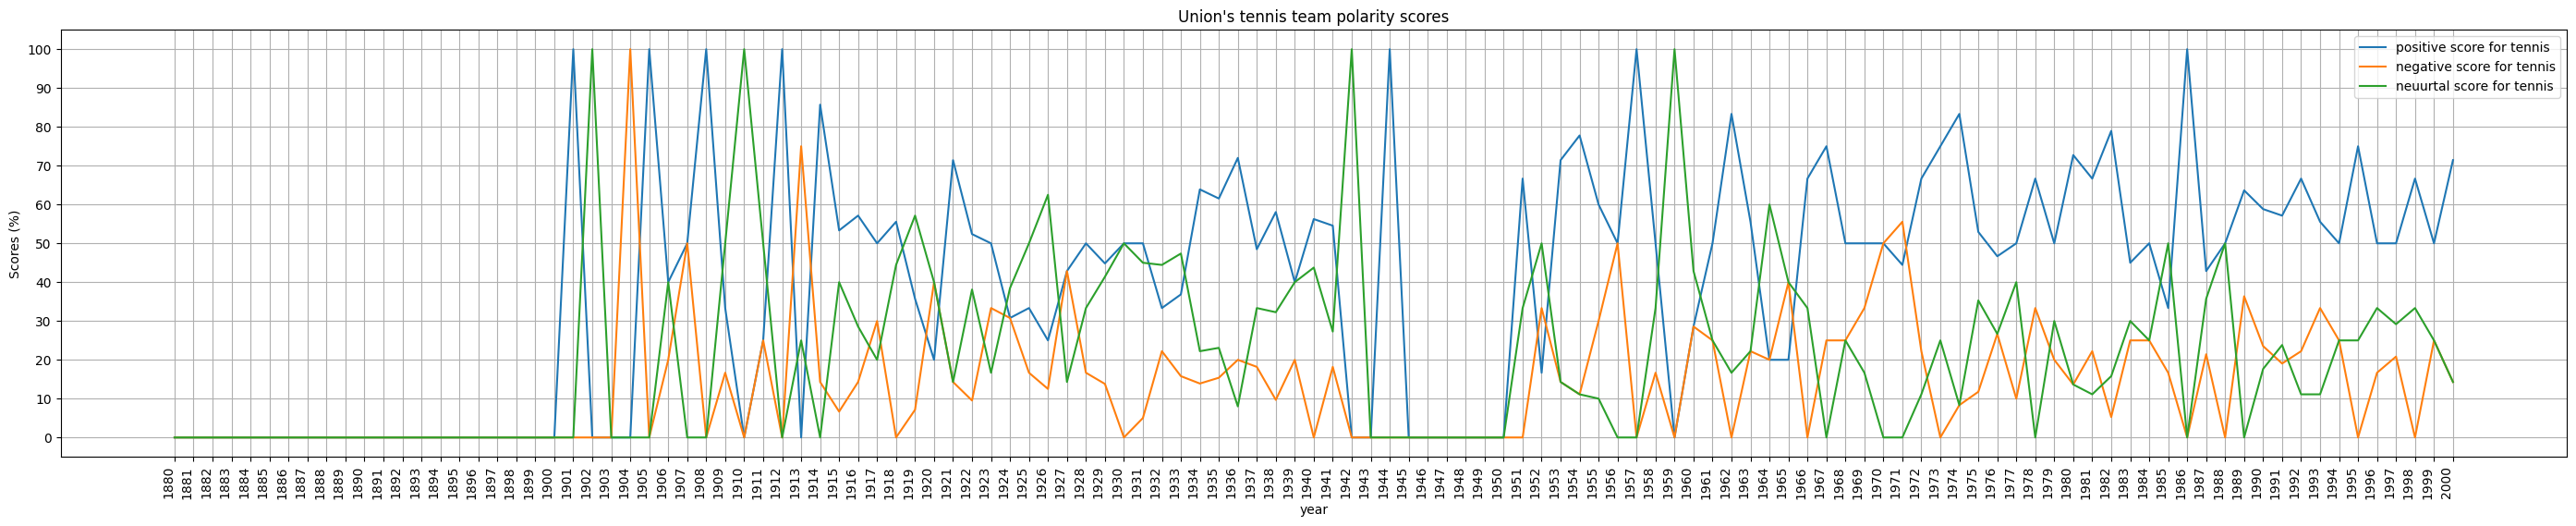

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

for sport in union_sports:
  plt.figure(figsize = (35, 6))

  plt.plot(years,sports_dict_pos[sport],label='positive score for {}'.format(sport))
  plt.plot(years,sports_dict_neg[sport],label='negative score for {}'.format(sport))
  plt.plot(years,sports_dict_neu[sport],label='neuurtal score for {}'.format(sport))

  plt.title("Union's {} team polarity scores".format(sport))
  plt.xlabel('year')
  plt.ylabel('Scores (%)')
  plt.legend()
  plt.xticks(years,rotation=90, ha='right')
  plt.yticks(np.arange(0, 101, 10))
  plt.grid()
  plt.show()

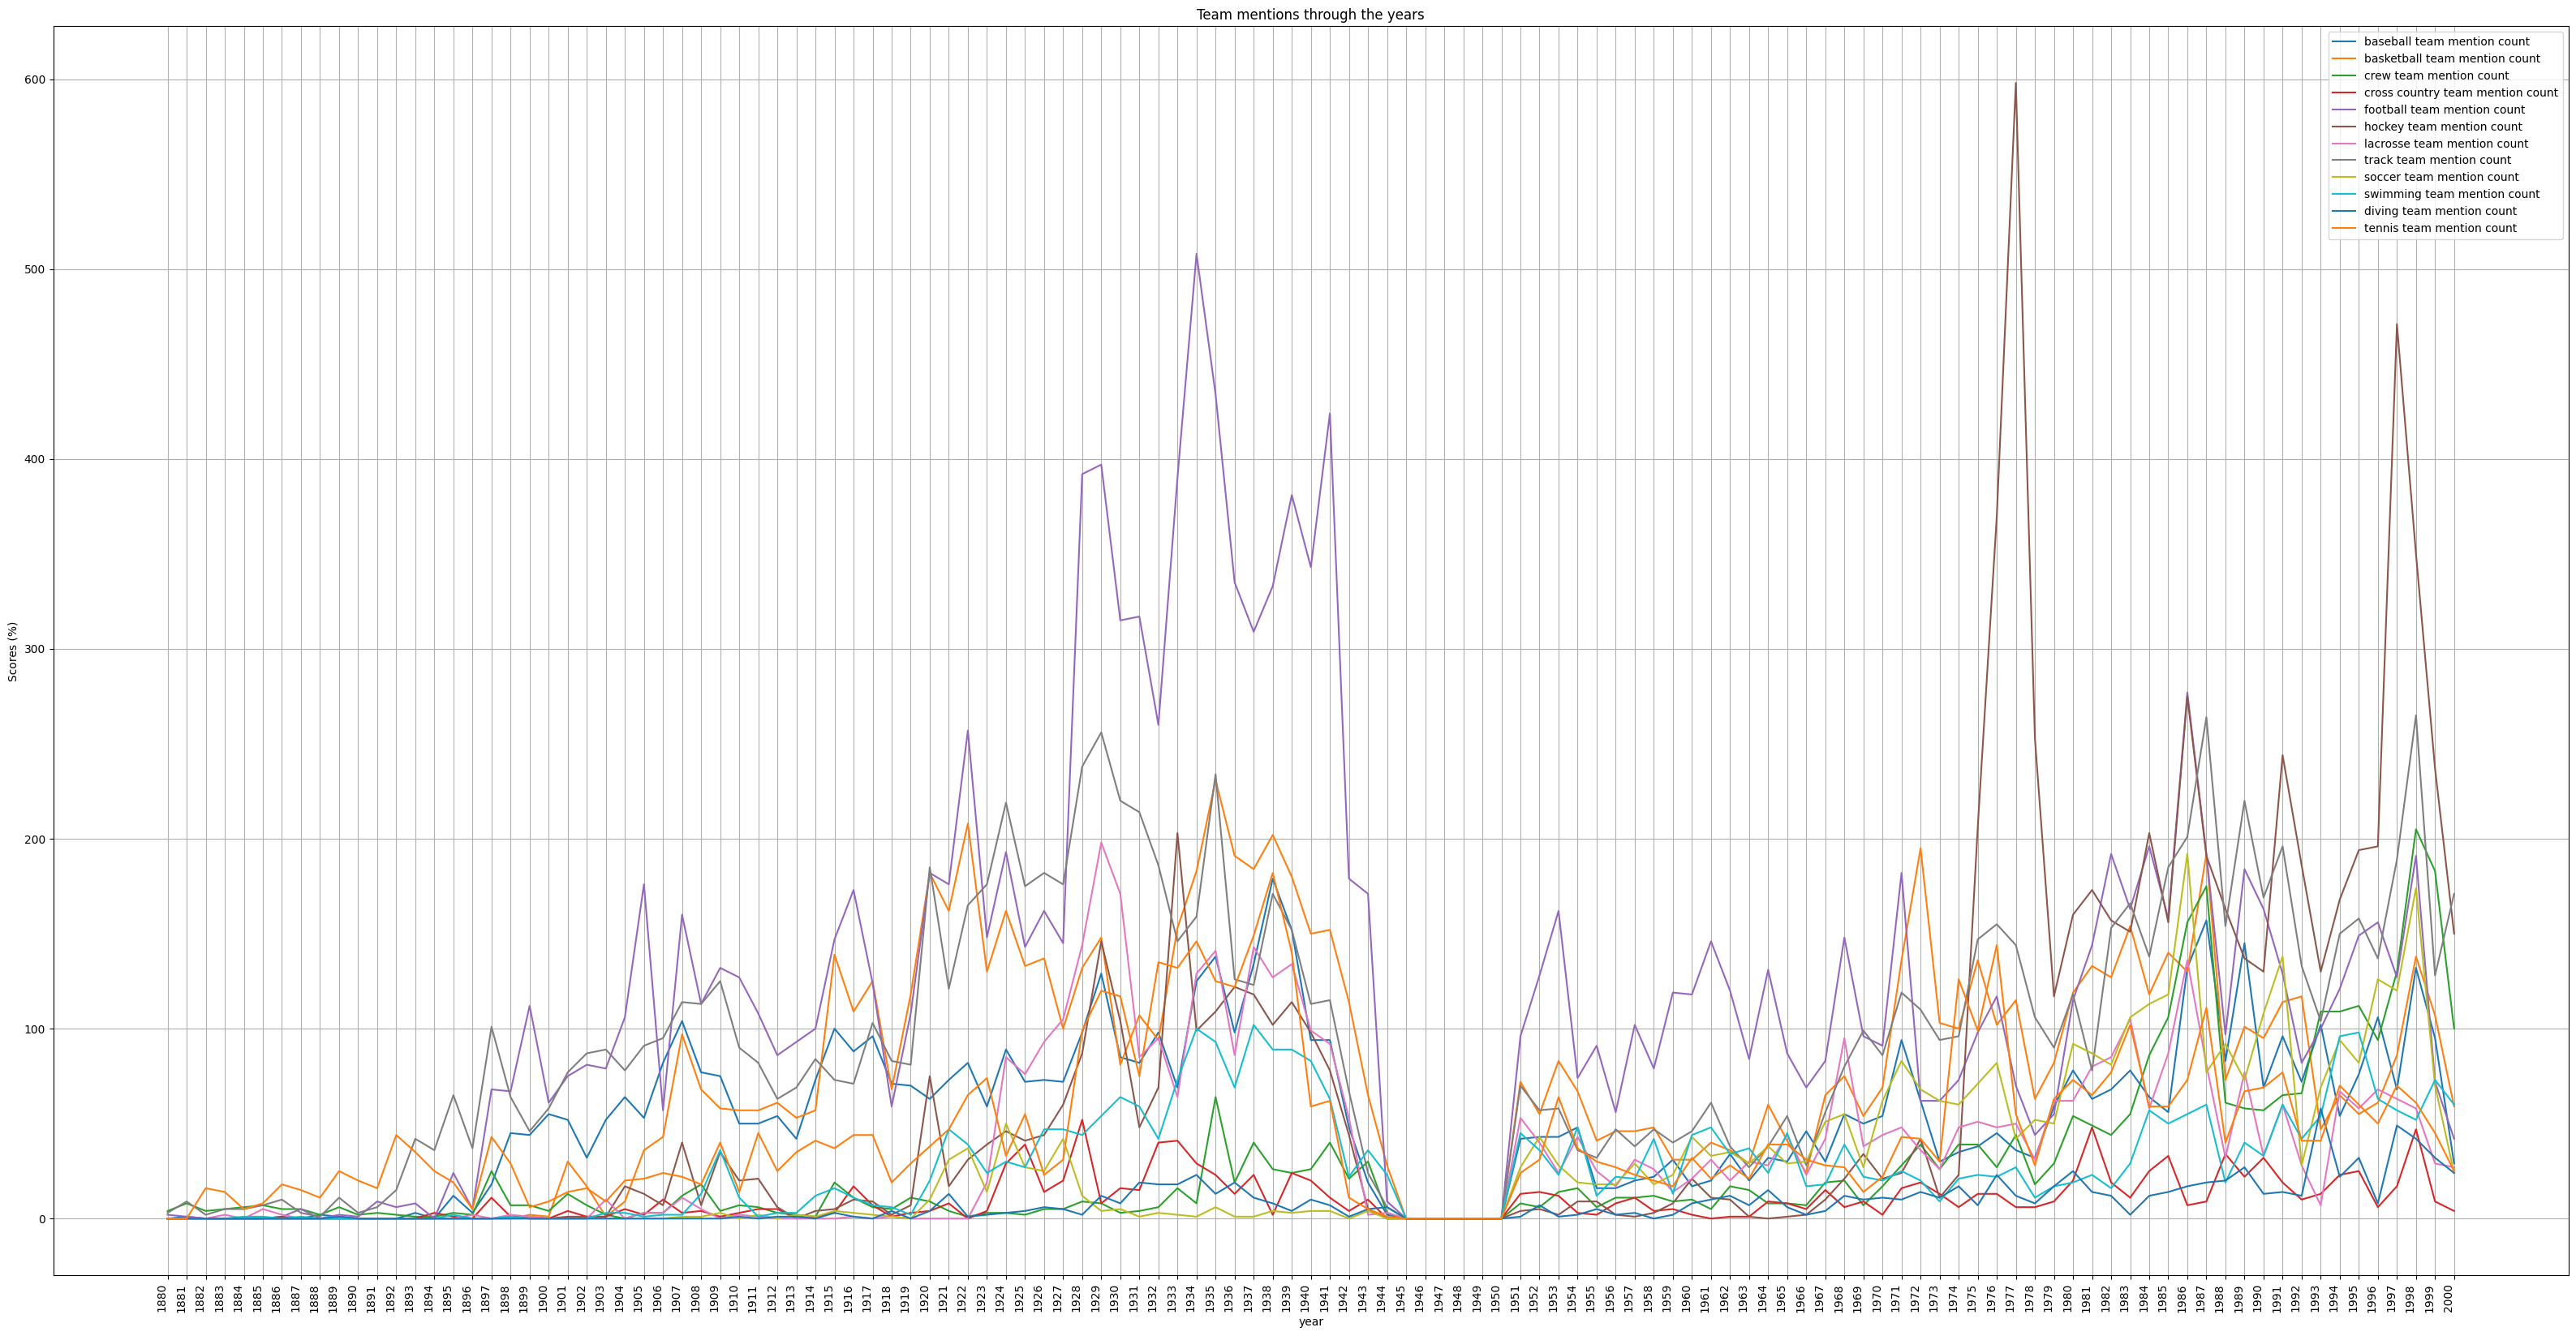

In [ ]:
plt.figure(figsize = (40, 20))
for sport in union_sports:
  plt.plot(years,team_mention_count[sport],label="{} team mention count".format(sport))


plt.title("Team mentions through the years")
plt.xlabel('year')
plt.ylabel('Scores (%)')
plt.legend()
plt.xticks(years, rotation=90, ha='right')
plt.yticks()
plt.grid()
plt.show()
plt.show()

### Report Submission

Your job is both simple, and NOT clearly defined. I want you to work with this data, and tell me a story. What can you find? What results do you get? What do they mean? What interesting features of the language can you find that are interesting.

### Conclusion

Overall, the data suggests a turn from football being the school's most popular sport to Hockey, though football is still a very prevalent sport at the school.  Before anything else, the biggest notes of the graph are the large gap from 1945-1950 due to World War II and the slow beginning of sports discussion between 1880, the start of the graph, and 1991, where the mentions of sports teams in the newspaper began to take off.  Secondly, the lack of polarity scores for the crew team.

Beginning in 1899, football was for the most part had the most discussed team from 1928-1943 especially with an exceedingly high margin compared to the other sports.  However, after the 1945-1950 hiatus of the paper, it was not discussed in the paper as much as it was before the hiatus.  The most discussed sport became hockey, being even more mentioned in the paper than football ever was at one point. As the school is d1 hockey in 1991, this information makes sense.  The other sports are mentioned about as much as each other after the hiatus, though the mentions between each sport is more even compared to before the hiatus, where football, track and field, basketball, swimming, diving, and lacross are mentioned the most.

In terms of sentimentallity in the newspapers, some sports have very interesting polarity scores, while others are an extremely mixed bag of extremes between positive, neutral, and negative polarity percentiles regarding sentences discussing their teams' sport.  The said sports with extreme graphs are diving, soccer, and crew.  Cross country for some reason has a true neutral polarity.  For the most part, all sports are discussed with positive sentimentality, which makes sense as any school's paper intends to put their school in a positive light.  

Before the hiatus, the baseball teams have a mostly matching sentimentality between neutral and positive mentioning of the teams.  Of all the sports' teams discussed, they are talked about with the most neurtrality.  Meanwhile, football and tennis have the most consistent sentimentality, each being very high in their positive sentimentality around 70%.

Most of the sports seem to round out to having the same average positive sentimentality around 60-70% and having a low negative sentimentality around 20-30%.  Their neutral scores are very different between all of them for the most part.

While the amount of discussion may be very easy to measure, the new's spin on each of them are usually in a positive light.